<a href="https://colab.research.google.com/github/Swaraj1510/DM_Case_Study/blob/main/DM_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMART CITY IoT TRAFFIC PREDICTION SYSTEM

✅ Data loaded successfully!
   Dataset Shape: (48204, 9)
   Columns: ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']

--- Initial Data Preview ---
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00 

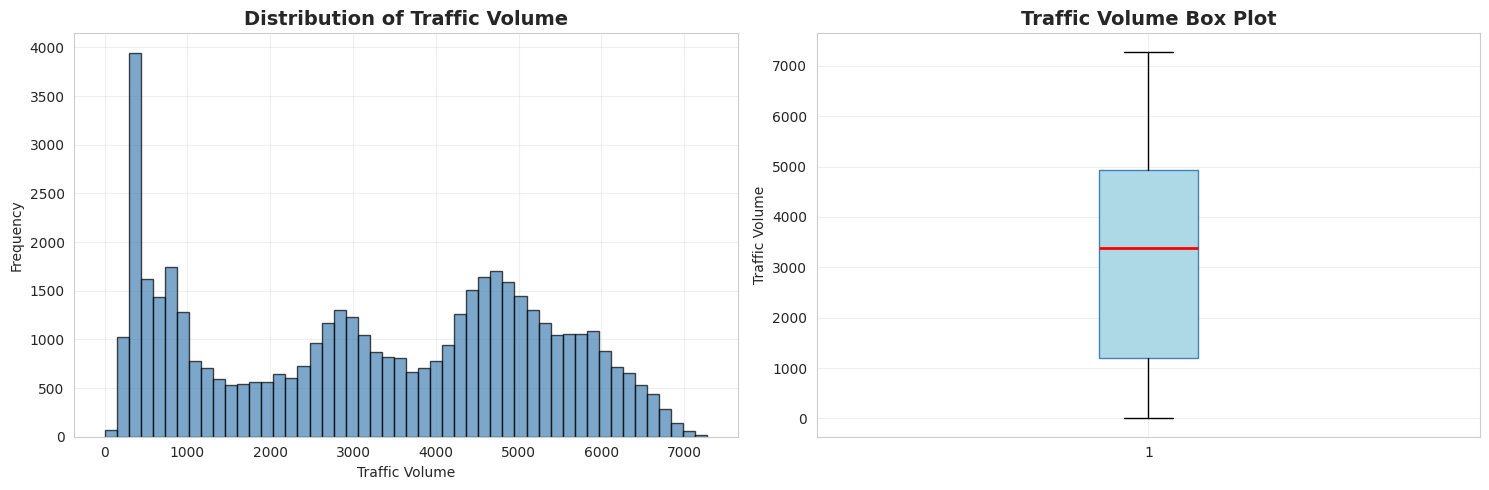


📊 Visualization saved: '01_data_distribution.png'

SECTION 1 COMPLETE


In [ ]:
# ============================================================
# SECTION 1: ENVIRONMENT SETUP & DATA LOADING
# ============================================================

# Install necessary libraries
!pip install xgboost pandas numpy scikit-learn matplotlib seaborn joblib -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*70)
print("SMART CITY IoT TRAFFIC PREDICTION SYSTEM")
print("="*70)

# --- Data Loading ---
try:
    df = pd.read_csv('/content/traffic.csv.csv')
    print(f"\n✅ Data loaded successfully!")
    print(f"   Dataset Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")

    # Initial Data Exploration
    print("\n--- Initial Data Preview ---")
    print(df.head())

    print("\n--- Data Info ---")
    print(df.info())

    print("\n--- Missing Values ---")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("   No missing values detected!")

    print("\n--- Statistical Summary ---")
    print(df.describe())

    # Visualization: Distribution of Traffic Volume
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    axes[0].hist(df['traffic_volume'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Traffic Volume', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Traffic Volume')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3)

    # Box plot
    axes[1].boxplot(df['traffic_volume'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='steelblue'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Traffic Volume Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Traffic Volume')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('01_data_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n📊 Visualization saved: '01_data_distribution.png'")

except FileNotFoundError:
    print("\n❌ ERROR: 'traffic.csv' not found!")
    print("   Please upload the dataset to your Colab environment.")
    df = None
except Exception as e:
    print(f"\n❌ ERROR loading data: {str(e)}")
    df = None

print("\n" + "="*70)
print("SECTION 1 COMPLETE")
print("="*70)

SECTION 2: DATA PREPROCESSING & FEATURE ENGINEERING

[1/6] Data Cleaning...
   ✓ Records after cleaning: 61

[2/6] Creating Time-based Features...
   ✓ Time features created: Hour, DayOfWeek, Month, IsWeekend

[3/6] Encoding Categorical Features...
   ✓ Categorical encoding complete

[4/6] Creating Target Variable (Traffic Level)...
   ✓ Target variable created with 3 classes
   ✓ Lag features added

[5/6] Encoding Target Variable...
   ✓ Target classes: ['High' 'Low' 'Medium']

[6/6] Creating Feature Matrix...


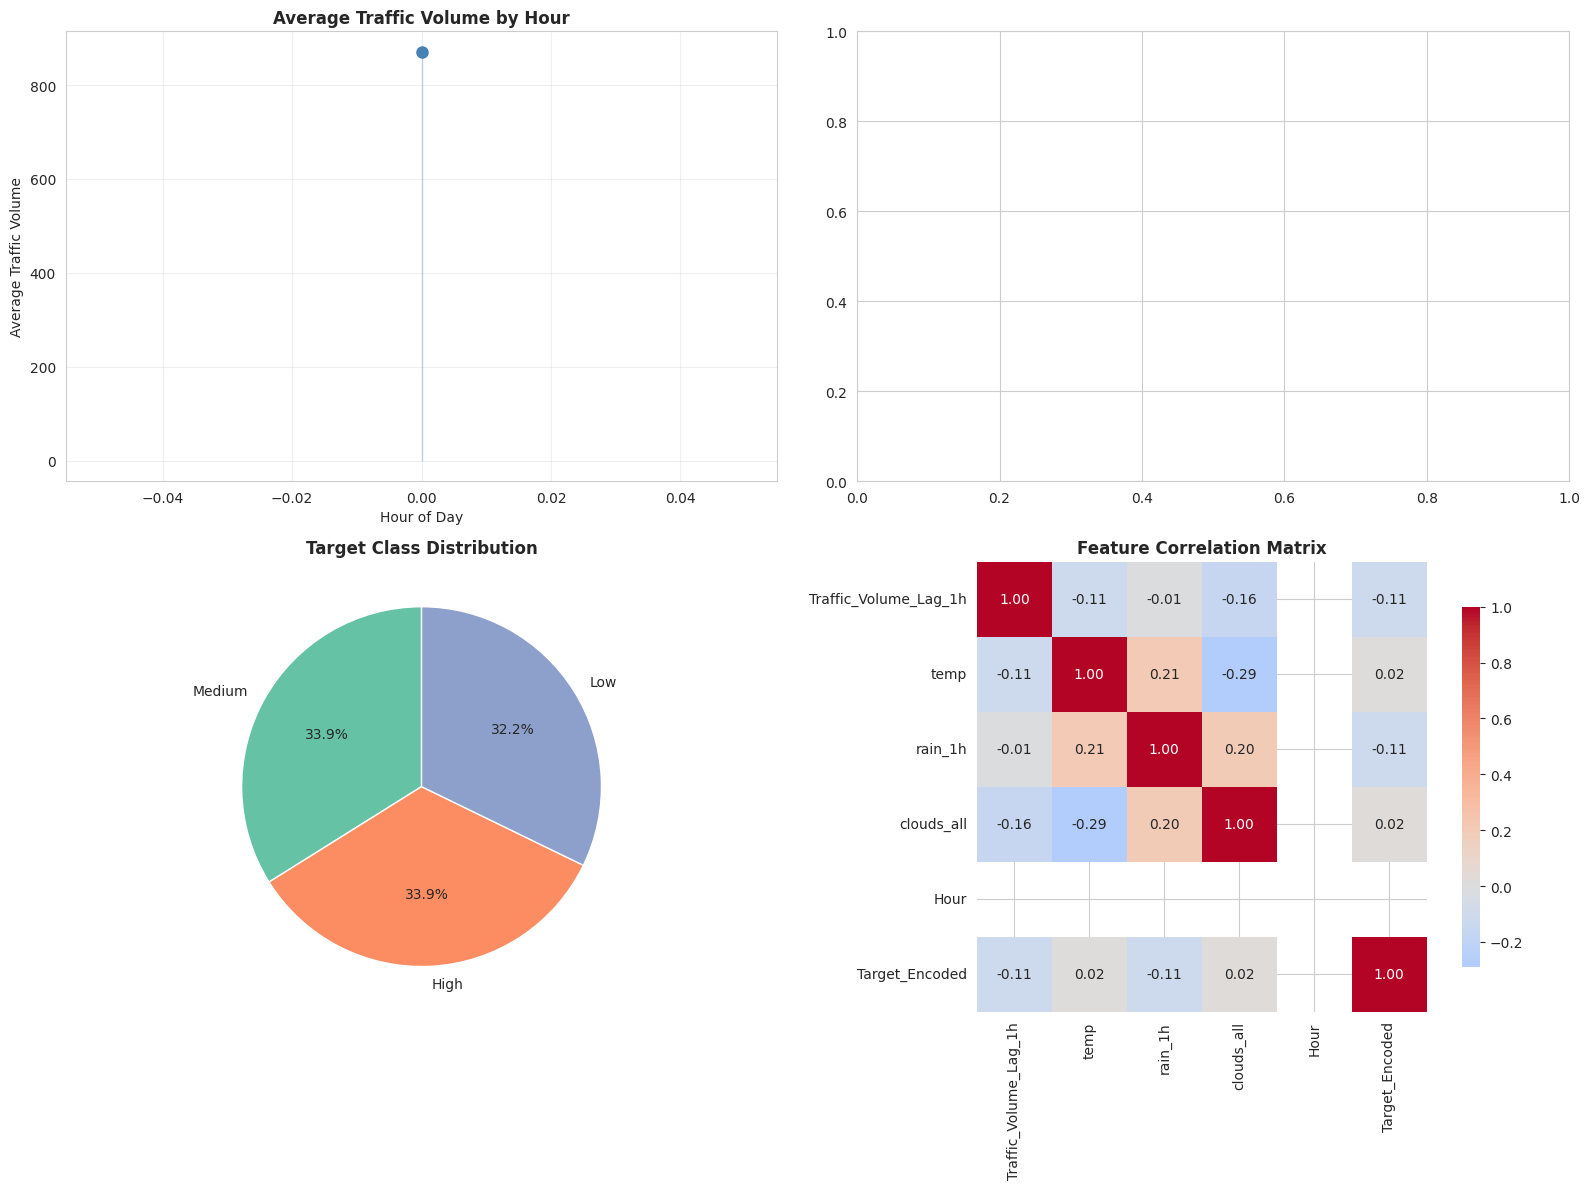


PREPROCESSING SUMMARY
Split Method: Time-based
Total Features: 10
  - Numerical: 4
  - Categorical: 6

Dataset Split:
  Train: 47 samples (79.7%)
  Test:  12 samples (20.3%)

Target Distribution (Train):
  High: 15 (31.9%)
  Low: 14 (29.8%)
  Medium: 18 (38.3%)

📊 Visualization saved: '02_feature_engineering.png'
SECTION 2 COMPLETE


In [ ]:
# ============================================================
# SECTION 2: DATA PREPROCESSING & FEATURE ENGINEERING
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

if df is not None:
    print("="*70)
    print("SECTION 2: DATA PREPROCESSING & FEATURE ENGINEERING")
    print("="*70)

    # Rename columns for consistency
    df.rename(columns={
        'traffic_volume': 'Traffic_Volume',
        'date_time': 'DateTime'
    }, inplace=True)

    # --- Data Cleaning ---
    print("\n[1/6] Data Cleaning...")
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df = df.sort_values('DateTime').reset_index(drop=True)
    df = df[df['Traffic_Volume'] >= 0].copy()
    print(f"   ✓ Records after cleaning: {len(df)}")

    # --- Feature Engineering ---
    print("\n[2/6] Creating Time-based Features...")
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
    df['Month'] = df['DateTime'].dt.month
    df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
    print("   ✓ Time features created: Hour, DayOfWeek, Month, IsWeekend")

    print("\n[3/6] Encoding Categorical Features...")
    df['weather_main_code'] = pd.factorize(df['weather_main'])[0]
    df['holiday_code'] = df['holiday'].apply(lambda x: 1 if x != 'None' else 0)
    print("   ✓ Categorical encoding complete")

    # --- Target Creation ---
    print("\n[4/6] Creating Target Variable (Traffic Level)...")
    bins = df['Traffic_Volume'].quantile([0, 0.33, 0.66, 1.0])
    df['Traffic_Level'] = pd.cut(
        df['Traffic_Volume'],
        bins=bins,
        labels=['Low', 'Medium', 'High'],
        include_lowest=True
    )
    df['Traffic_Target'] = df['Traffic_Level'].shift(-1)

    # Lag features
    df['Traffic_Volume_Lag_1h'] = df['Traffic_Volume'].shift(1)
    df.dropna(inplace=True)

    print(f"   ✓ Target variable created with {df['Traffic_Level'].nunique()} classes")
    print(f"   ✓ Lag features added")

    # --- Encoding Target ---
    print("\n[5/6] Encoding Target Variable...")
    le = LabelEncoder()
    df['Target_Encoded'] = le.fit_transform(df['Traffic_Target'])
    print(f"   ✓ Target classes: {le.classes_}")

    # --- Feature Selection & Train-Test Split ---
    print("\n[6/6] Creating Feature Matrix...")
    features = [
        'Traffic_Volume_Lag_1h',
        'temp',
        'rain_1h',
        'clouds_all',
        'Hour',
        'DayOfWeek',
        'Month',
        'IsWeekend',
        'weather_main_code',
        'holiday_code'
    ]

    X = df[features]
    y = df['Target_Encoded']

    # Time-based split
    split_point = int(0.8 * len(df))
    X_train_temp, X_test = X[:split_point], X[split_point:]
    y_train_temp, y_test = y[:split_point], y[split_point:]

    # Check for class diversity
    if len(np.unique(y_train_temp)) < 2:
        print("\n   ⚠️  Time-based split has insufficient classes. Using stratified split...")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        split_method = "Stratified"
    else:
        X_train, y_train = X_train_temp, y_train_temp
        split_method = "Time-based"

    # --- Feature Scaling ---
    numerical_features = ['Traffic_Volume_Lag_1h', 'temp', 'rain_1h', 'clouds_all']
    categorical_features = [f for f in features if f not in numerical_features]

    X_train_num = X_train[numerical_features]
    X_test_num = X_test[numerical_features]
    X_train_cat = X_train[categorical_features]
    X_test_cat = X_test[categorical_features]

    scaler = StandardScaler()
    X_train_scaled_num = scaler.fit_transform(X_train_num)
    X_test_scaled_num = scaler.transform(X_test_num)

    X_train_scaled = np.hstack((X_train_scaled_num, X_train_cat.values))
    X_test_scaled = np.hstack((X_test_scaled_num, X_test_cat.values))

    # --- Visualization ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Traffic by Hour
    hourly_avg = df.groupby('Hour')['Traffic_Volume'].mean()
    axes[0, 0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2,
                    color='steelblue', markersize=8)
    axes[0, 0].fill_between(hourly_avg.index, hourly_avg.values, alpha=0.3, color='steelblue')
    axes[0, 0].set_title('Average Traffic Volume by Hour', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Average Traffic Volume')
    axes[0, 0].grid(True, alpha=0.3)

    # # 2. Traffic by Day of Week
    # dow_avg = df.groupby('DayOfWeek')['Traffic_Volume'].mean()
    # dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    # colors = ['#1f77b4']*5 + ['#ff7f0e']*2
    # axes[0, 1].bar(range(7), dow_avg.values, color=colors, edgecolor='black', alpha=0.7)
    # axes[0, 1].set_title('Average Traffic Volume by Day of Week', fontsize=12, fontweight='bold')
    # axes[0, 1].set_xlabel('Day of Week')
    # axes[0, 1].set_ylabel('Average Traffic Volume')
    # axes[0, 1].set_xticks(range(7))
    # axes[0, 1].set_xticklabels(dow_labels)
    # axes[0, 1].grid(True, alpha=0.3, axis='y')

    # 3. Target Distribution
    target_counts = df['Traffic_Target'].value_counts()
    axes[1, 0].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
                   colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=90)
    axes[1, 0].set_title('Target Class Distribution', fontsize=12, fontweight='bold')

    # 4. Correlation Heatmap
    corr_features = ['Traffic_Volume_Lag_1h', 'temp', 'rain_1h', 'clouds_all',
                     'Hour', 'Target_Encoded']
    corr_matrix = df[corr_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, ax=axes[1, 1], cbar_kws={'shrink': 0.8})
    axes[1, 1].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('02_feature_engineering.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- Summary ---
    print("\n" + "="*70)
    print("PREPROCESSING SUMMARY")
    print("="*70)
    print(f"Split Method: {split_method}")
    print(f"Total Features: {len(features)}")
    print(f"  - Numerical: {len(numerical_features)}")
    print(f"  - Categorical: {len(categorical_features)}")
    print(f"\nDataset Split:")
    print(f"  Train: {len(X_train_scaled)} samples ({len(X_train_scaled)/len(X)*100:.1f}%)")
    print(f"  Test:  {len(X_test_scaled)} samples ({len(X_test_scaled)/len(X)*100:.1f}%)")
    print(f"\nTarget Distribution (Train):")
    for cls, count in zip(*np.unique(y_train, return_counts=True)):
        print(f"  {le.classes_[cls]}: {count} ({count/len(y_train)*100:.1f}%)")
    print("\n📊 Visualization saved: '02_feature_engineering.png'")
    print("="*70)
    print("SECTION 2 COMPLETE")
    print("="*70)

else:
    print("❌ ERROR: DataFrame not available. Run Section 1 first.")

SECTION 3: STREAMING PATTERN MINING (DYNA-MINER)

[Algorithm Configuration]
  Minimum Support: 0.1 (6 transactions)
  Error Parameter (ε): 0.05
  Bucket Width (W): 20
  Stream Size: 59 records

[Phase 1/3] Processing Stream...

[Phase 2/3] Extracting Frequent Patterns...

[Phase 3/3] Results Summary
  ✓ Mining completed in 0.00 seconds
  ✓ Transactions processed: 59
  ✓ Pruning operations: 2
  ✓ Items pruned: 16
  ✓ Final summary size: 68
  ✓ Frequent patterns found: 52

[Top 15 Frequent Patterns]
----------------------------------------------------------------------
 1. WEEKDAY
    Count: 59 | Support: 1.000 | Size: 1-itemset
 2. HOLIDAY
    Count: 59 | Support: 1.000 | Size: 1-itemset
 3. OFF_PEAK
    Count: 59 | Support: 1.000 | Size: 1-itemset
 4. WEEKDAY + HOLIDAY
    Count: 59 | Support: 1.000 | Size: 2-itemset
 5. WEEKDAY + OFF_PEAK
    Count: 59 | Support: 1.000 | Size: 2-itemset
 6. HOLIDAY + OFF_PEAK
    Count: 59 | Support: 1.000 | Size: 2-itemset
 7. DRY
    Count: 55 | Sup

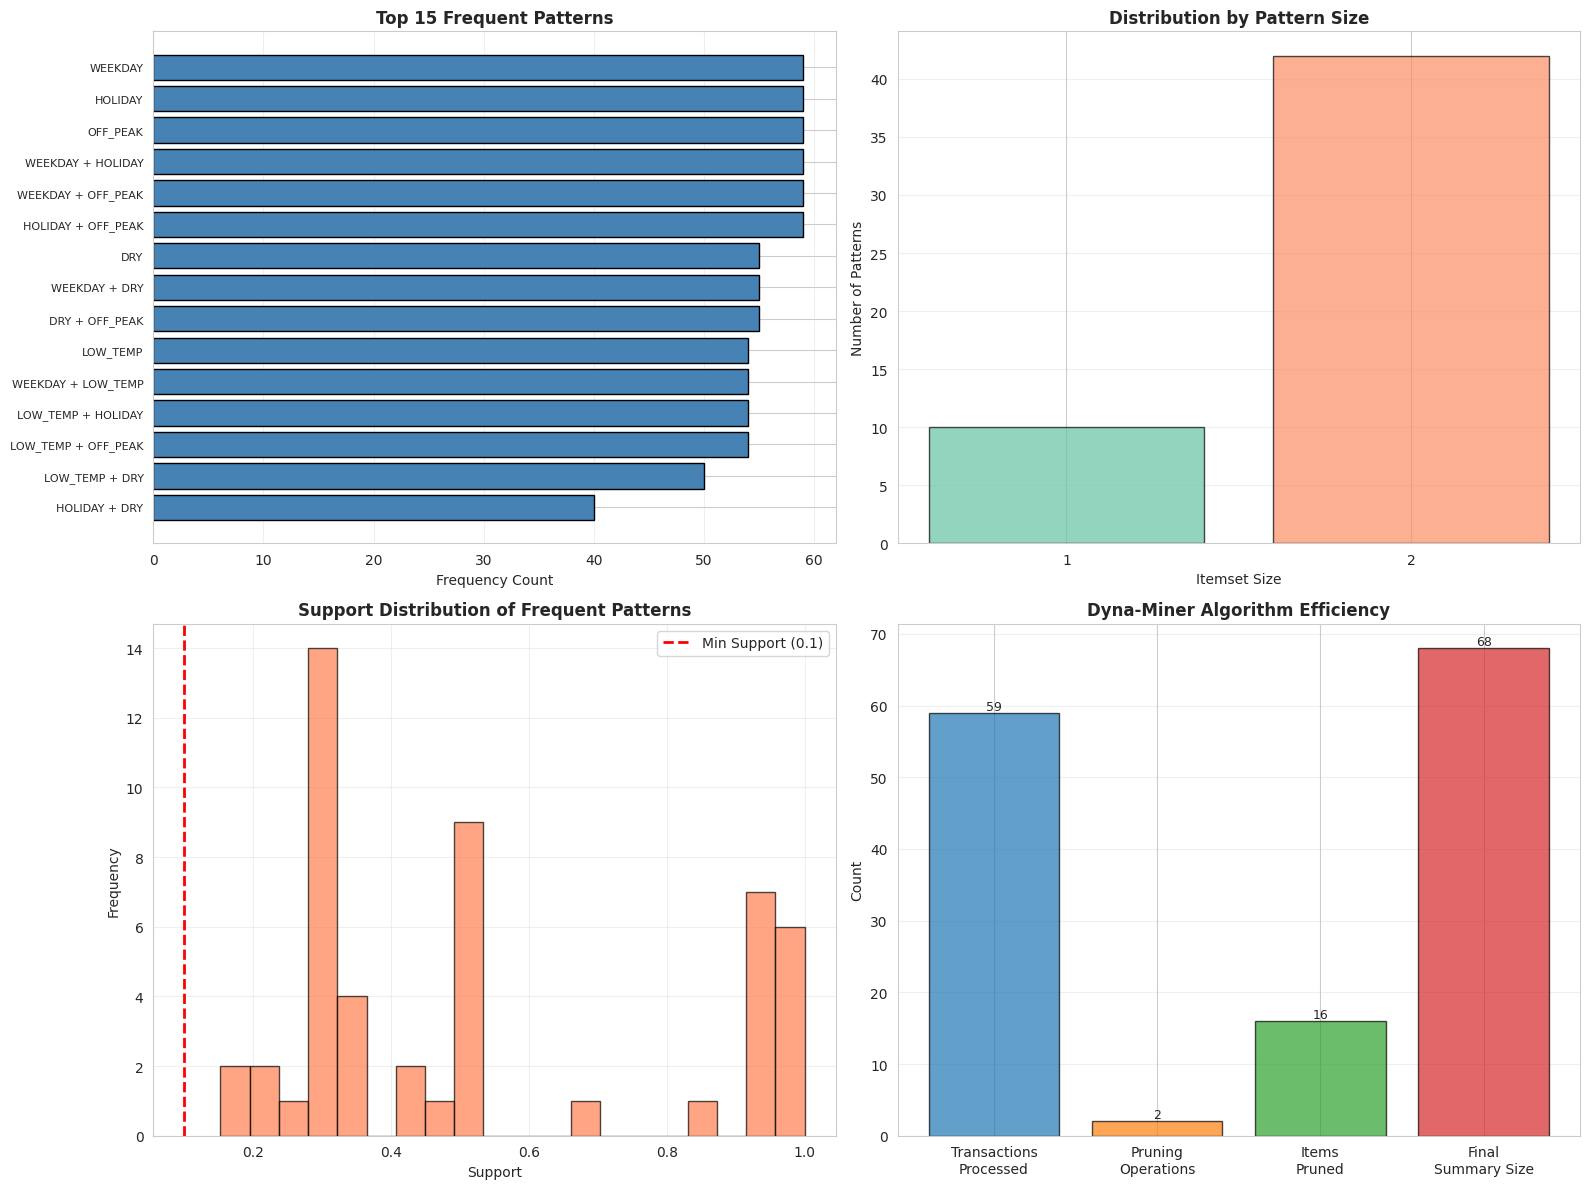


📊 Visualization saved: '03_streaming_pattern_mining.png'

SECTION 3 COMPLETE


In [ ]:
# ============================================================
# SECTION 3: STREAMING PATTERN MINING (DYNA-MINER ALGORITHM)
# ============================================================

from itertools import combinations
import time

def run_dyna_miner(stream_df, min_support_pct=0.10, error_epsilon=0.05,
                   visualize=True, max_display=15):
    """
    Implements Dyna-Miner (Lossy Counting-based) for frequent itemset mining
    in IoT data streams without re-mining entire dataset.

    Parameters:
    - stream_df: DataFrame containing the stream data
    - min_support_pct: Minimum support threshold (0.0-1.0)
    - error_epsilon: Error guarantee parameter (0.0-1.0)
    - visualize: Whether to create visualizations
    - max_display: Maximum patterns to display

    Returns:
    - Dictionary of frequent patterns with counts
    """

    print("="*70)
    print("SECTION 3: STREAMING PATTERN MINING (DYNA-MINER)")
    print("="*70)

    # Algorithm parameters
    W = int(np.ceil(1 / error_epsilon))  # Bucket width
    min_support_count = min_support_pct * len(stream_df)

    print(f"\n[Algorithm Configuration]")
    print(f"  Minimum Support: {min_support_pct} ({min_support_count:.0f} transactions)")
    print(f"  Error Parameter (ε): {error_epsilon}")
    print(f"  Bucket Width (W): {W}")
    print(f"  Stream Size: {len(stream_df):,} records")

    # Initialize data structures
    summary = {}  # {itemset: [count, max_error]}
    bucket_count = 1
    total_processed = 0
    pruning_stats = {'operations': 0, 'items_pruned': 0}

    def get_items(row):
        """Extract boolean items from a transaction"""
        items = set()

        # Traffic level itemset
        traffic_level = row['Traffic_Level']
        items.add(f"TRAFFIC_{traffic_level}")

        # Time-based itemsets
        if 7 <= row['Hour'] <= 9:
            items.add('PEAK_MORNING')
        if 16 <= row['Hour'] <= 18:
            items.add('PEAK_EVENING')
        if row['Hour'] < 6 or row['Hour'] >= 22:
            items.add('OFF_PEAK')

        # Day itemsets
        if row['DayOfWeek'] >= 5:
            items.add('WEEKEND')
        else:
            items.add('WEEKDAY')

        # Environmental/IoT itemsets
        if row['temp'] > 295:  # ~22°C threshold
            items.add('HIGH_TEMP')
        else:
            items.add('LOW_TEMP')

        if row['rain_1h'] > 0:
            items.add('RAINY')
        else:
            items.add('DRY')

        if row['clouds_all'] > 50:
            items.add('CLOUDY')
        else:
            items.add('CLEAR')

        if row['holiday_code'] == 1:
            items.add('HOLIDAY')

        return items

    # Start mining
    print(f"\n[Phase 1/3] Processing Stream...")
    start_time = time.time()

    for index, row in stream_df.iterrows():
        total_processed += 1

        # Extract itemsets from transaction
        current_items = get_items(row)

        # Generate 1-itemsets and 2-itemsets
        itemsets = [(item,) for item in current_items]
        itemsets.extend(list(combinations(current_items, 2)))

        # Update counts
        for itemset in itemsets:
            if itemset in summary:
                summary[itemset][0] += 1
            else:
                summary[itemset] = [1, bucket_count - 1]

        # Pruning at bucket boundaries
        if total_processed % W == 0:
            pruned_keys = []
            current_bucket_index = total_processed // W

            for itemset, (count, error) in summary.items():
                if count + error <= current_bucket_index:
                    pruned_keys.append(itemset)

            for key in pruned_keys:
                del summary[key]

            pruning_stats['operations'] += 1
            pruning_stats['items_pruned'] += len(pruned_keys)
            bucket_count += 1

        # Progress indicator
        if total_processed % 5000 == 0:
            print(f"  ⏳ Processed {total_processed:,} records | "
                  f"Summary size: {len(summary):,}")

    mining_time = time.time() - start_time

    print(f"\n[Phase 2/3] Extracting Frequent Patterns...")
    final_bucket_index = total_processed // W

    # Extract frequent patterns
    frequent_patterns = {}
    for itemset, (count, error) in summary.items():
        if count >= min_support_count - final_bucket_index:
            pattern_str = " + ".join(map(str, itemset))
            frequent_patterns[pattern_str] = {
                'count': count,
                'support': count / total_processed,
                'size': len(itemset)
            }

    # Sort by count
    sorted_patterns = sorted(frequent_patterns.items(),
                           key=lambda x: x[1]['count'],
                           reverse=True)

    # Display results
    print(f"\n[Phase 3/3] Results Summary")
    print(f"  ✓ Mining completed in {mining_time:.2f} seconds")
    print(f"  ✓ Transactions processed: {total_processed:,}")
    print(f"  ✓ Pruning operations: {pruning_stats['operations']}")
    print(f"  ✓ Items pruned: {pruning_stats['items_pruned']:,}")
    print(f"  ✓ Final summary size: {len(summary):,}")
    print(f"  ✓ Frequent patterns found: {len(frequent_patterns)}")

    print(f"\n[Top {max_display} Frequent Patterns]")
    print("-" * 70)
    for i, (pattern, stats) in enumerate(sorted_patterns[:max_display], 1):
        print(f"{i:2d}. {pattern}")
        print(f"    Count: {stats['count']:,} | "
              f"Support: {stats['support']:.3f} | "
              f"Size: {stats['size']}-itemset")

    # Visualization
    if visualize and len(sorted_patterns) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Top patterns by count
        top_n = min(15, len(sorted_patterns))
        patterns = [p[0][:40] + '...' if len(p[0]) > 40 else p[0]
                   for p in sorted_patterns[:top_n]]
        counts = [p[1]['count'] for p in sorted_patterns[:top_n]]

        axes[0, 0].barh(range(top_n), counts, color='steelblue', edgecolor='black')
        axes[0, 0].set_yticks(range(top_n))
        axes[0, 0].set_yticklabels(patterns, fontsize=8)
        axes[0, 0].set_xlabel('Frequency Count')
        axes[0, 0].set_title('Top 15 Frequent Patterns', fontsize=12, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')

        # 2. Pattern size distribution
        size_dist = {}
        for pattern, stats in frequent_patterns.items():
            size = stats['size']
            size_dist[size] = size_dist.get(size, 0) + 1

        sizes = sorted(size_dist.keys())
        size_counts = [size_dist[s] for s in sizes]
        colors = ['#66c2a5', '#fc8d62', '#8da0cb'][:len(sizes)]

        axes[0, 1].bar(sizes, size_counts, color=colors, edgecolor='black', alpha=0.7)
        axes[0, 1].set_xlabel('Itemset Size')
        axes[0, 1].set_ylabel('Number of Patterns')
        axes[0, 1].set_title('Distribution by Pattern Size', fontsize=12, fontweight='bold')
        axes[0, 1].set_xticks(sizes)
        axes[0, 1].grid(True, alpha=0.3, axis='y')

        # 3. Support distribution
        supports = [p[1]['support'] for p in sorted_patterns[:50]]
        axes[1, 0].hist(supports, bins=20, color='coral', edgecolor='black', alpha=0.7)
        axes[1, 0].axvline(min_support_pct, color='red', linestyle='--',
                          linewidth=2, label=f'Min Support ({min_support_pct})')
        axes[1, 0].set_xlabel('Support')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Support Distribution of Frequent Patterns',
                            fontsize=12, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Algorithm efficiency metrics
        metrics = ['Transactions\nProcessed', 'Pruning\nOperations',
                  'Items\nPruned', 'Final\nSummary Size']
        values = [total_processed, pruning_stats['operations'],
                 pruning_stats['items_pruned'], len(summary)]

        bars = axes[1, 1].bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                             edgecolor='black', alpha=0.7)
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].set_title('Dyna-Miner Algorithm Efficiency',
                            fontsize=12, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                          f'{int(height):,}',
                          ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.savefig('03_streaming_pattern_mining.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("\n📊 Visualization saved: '03_streaming_pattern_mining.png'")

    print("\n" + "="*70)
    print("SECTION 3 COMPLETE")
    print("="*70)

    return frequent_patterns

# Execute Dyna-Miner
if df is not None:
    patterns = run_dyna_miner(df, min_support_pct=0.10, error_epsilon=0.05)
else:
    print("❌ ERROR: DataFrame not available. Run previous sections first.")

SECTION 4: MACHINE LEARNING MODEL COMPARISON

[Training 5 Models]
Training samples: 47
Testing samples: 12
Features: 10
----------------------------------------------------------------------

[1/5] Training 1. Logistic Regression...
   ✓ Completed in 0.00s
   Accuracy: 0.1667 | F1-Macro: 0.1212

[2/5] Training 2. Decision Tree...
   ✓ Completed in 0.00s
   Accuracy: 0.2500 | F1-Macro: 0.2286

[3/5] Training 3. Random Forest (Bagging)...
   ✓ Completed in 0.14s
   Accuracy: 0.2500 | F1-Macro: 0.2407

[4/5] Training 4. XGBoost (Boosting)...
   ✓ Completed in 0.03s
   Accuracy: 0.2500 | F1-Macro: 0.2500

[5/5] Training 5. Support Vector Machine...
   ✓ Completed in 0.00s
   Accuracy: 0.1667 | F1-Macro: 0.1026

MODEL COMPARISON RESULTS
                            Accuracy  F1-Macro F1-Weighted  Time (s)
4. XGBoost (Boosting)           0.25      0.25        0.25  0.026998
3. Random Forest (Bagging)      0.25  0.240741    0.300926  0.136321
2. Decision Tree                0.25  0.228571    0

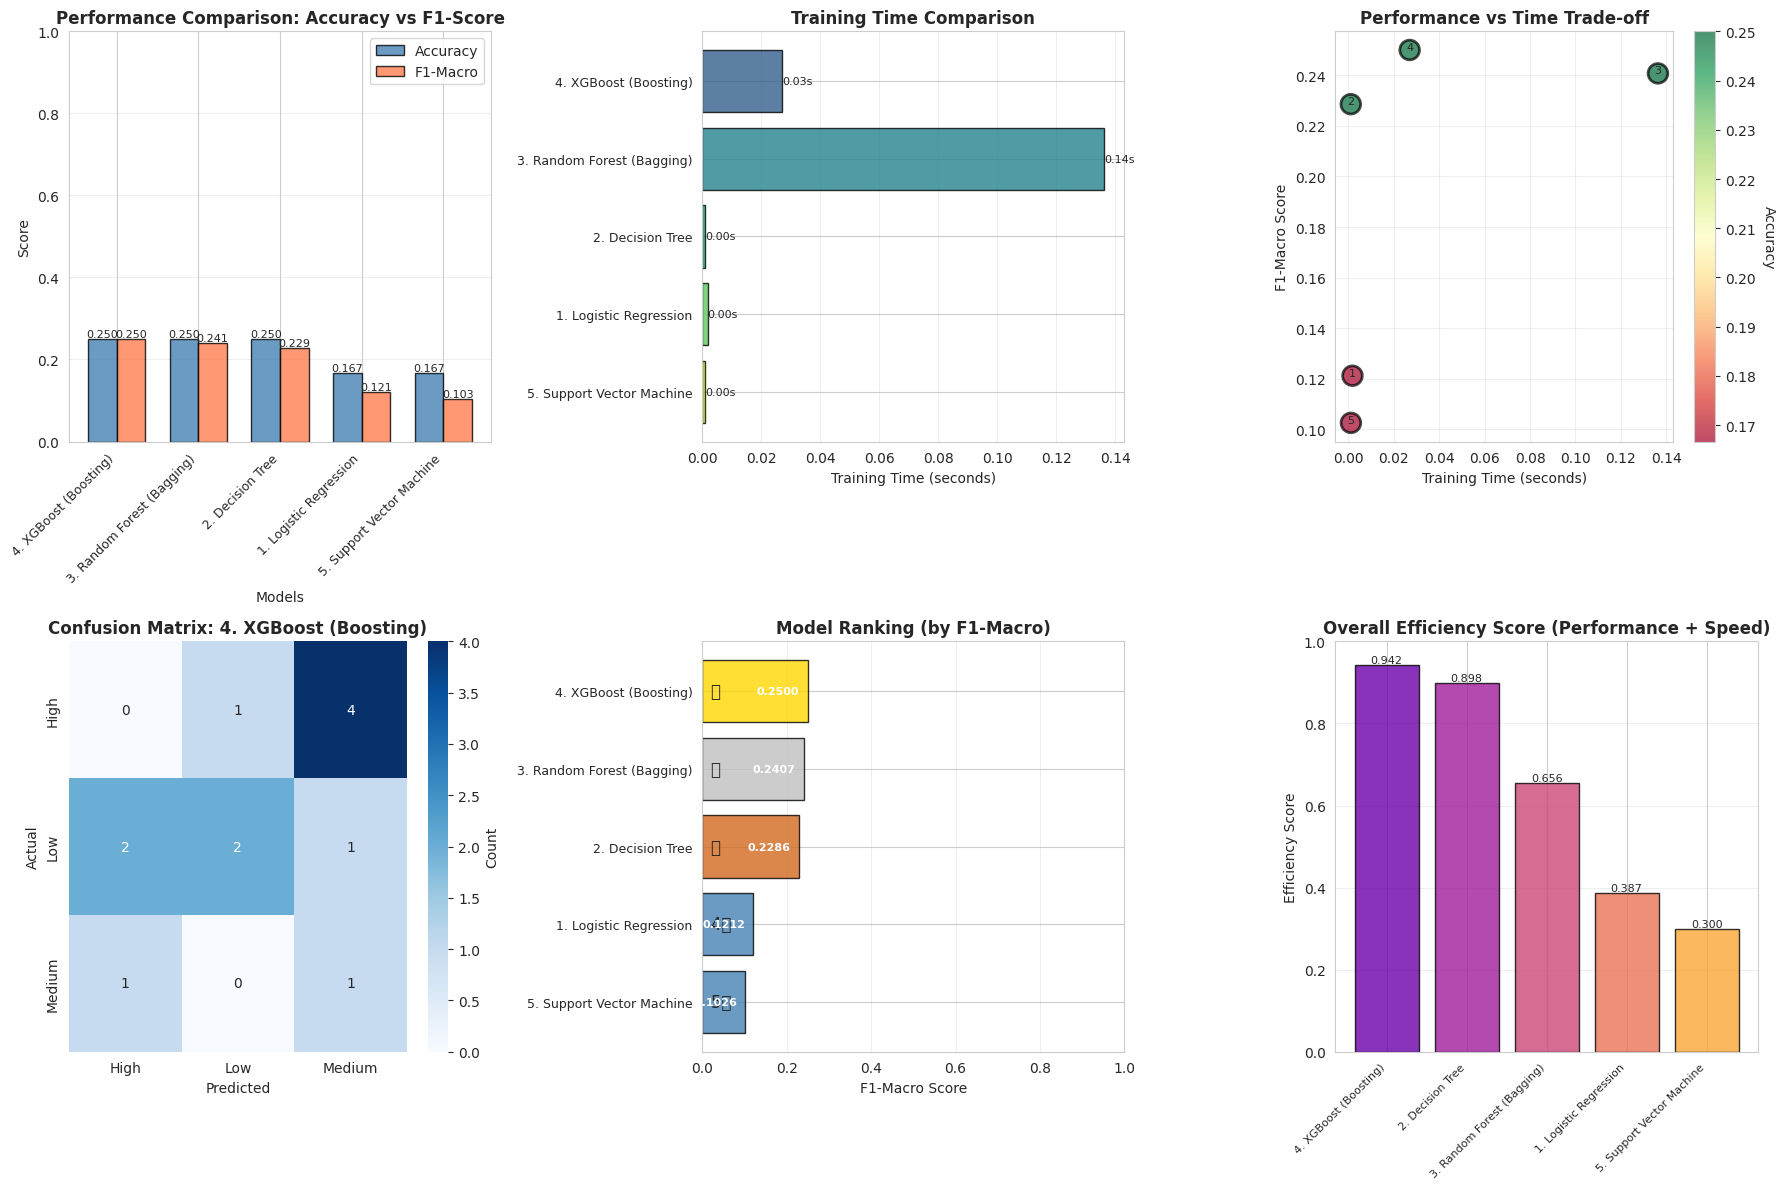


📊 Visualization saved: '04_model_comparison.png'

SECTION 4 COMPLETE


In [ ]:
# ============================================================
# SECTION 4: MACHINE LEARNING MODEL COMPARISON
# ============================================================

import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb

if df is not None and 'X_train_scaled' in locals():
    print("="*70)
    print("SECTION 4: MACHINE LEARNING MODEL COMPARISON")
    print("="*70)

    # Define models
    models = {
        '1. Logistic Regression': LogisticRegression(
            max_iter=1000, random_state=42, solver='liblinear'
        ),
        '2. Decision Tree': DecisionTreeClassifier(
            max_depth=10, random_state=42
        ),
        '3. Random Forest (Bagging)': RandomForestClassifier(
            n_estimators=100, random_state=42, n_jobs=-1
        ),
        '4. XGBoost (Boosting)': xgb.XGBClassifier(
            eval_metric='mlogloss', n_estimators=100,
            random_state=42, n_jobs=-1
        ),
        '5. Support Vector Machine': SVC(
            kernel='rbf', random_state=42
        )
    }

    print(f"\n[Training {len(models)} Models]")
    print(f"Training samples: {len(X_train_scaled):,}")
    print(f"Testing samples: {len(X_test_scaled):,}")
    print(f"Features: {X_train_scaled.shape[1]}")
    print("-" * 70)

    results = {}
    confusion_matrices = {}
    total_start = time.time()

    for idx, (name, model) in enumerate(models.items(), 1):
        print(f"\n[{idx}/{len(models)}] Training {name}...")

        start_time = time.time()

        # Train
        model.fit(X_train_scaled, y_train)

        # Predict
        y_pred = model.predict(X_test_scaled)

        training_time = time.time() - start_time

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
        f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'F1-Macro': f1_macro,
            'F1-Weighted': f1_weighted,
            'Time (s)': training_time,
            'Model': model
        }

        # Confusion matrix
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

        print(f"   ✓ Completed in {training_time:.2f}s")
        print(f"   Accuracy: {accuracy:.4f} | F1-Macro: {f1_macro:.4f}")

    total_time = time.time() - total_start

    # Create results DataFrame
    df_results = pd.DataFrame(results).T.drop('Model', axis=1)
    df_results_sorted = df_results.sort_values(by='F1-Macro', ascending=False)

    # Display results
    print("\n" + "="*70)
    print("MODEL COMPARISON RESULTS")
    print("="*70)
    print(df_results_sorted.to_string())
    print("="*70)
    print(f"Total training time: {total_time:.2f} seconds")

    # Find best model
    best_model_name = df_results['F1-Macro'].idxmax()
    best_model = results[best_model_name]['Model']
    print(f"\n🏆 Best Model: {best_model_name}")
    print(f"   F1-Macro Score: {df_results.loc[best_model_name, 'F1-Macro']:.4f}")

    # Detailed classification report for best model
    print(f"\n[Detailed Report: {best_model_name}]")
    y_pred_best = best_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred_best,
                               target_names=le.classes_,
                               zero_division=0))

    # --- Visualizations ---
    fig = plt.figure(figsize=(18, 12))

    # 1. Performance Comparison (Accuracy & F1-Score)
    ax1 = plt.subplot(2, 3, 1)
    df_plot = df_results_sorted[['Accuracy', 'F1-Macro']].copy()
    x = np.arange(len(df_plot))
    width = 0.35

    bars1 = ax1.bar(x - width/2, df_plot['Accuracy'], width,
                    label='Accuracy', color='steelblue', edgecolor='black', alpha=0.8)
    bars2 = ax1.bar(x + width/2, df_plot['F1-Macro'], width,
                    label='F1-Macro', color='coral', edgecolor='black', alpha=0.8)

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Score')
    ax1.set_title('Performance Comparison: Accuracy vs F1-Score', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=9)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim([0, 1.0])

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    # 2. Training Time Comparison
    ax2 = plt.subplot(2, 3, 2)
    times = df_results_sorted['Time (s)'].values
    colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(times)))
    bars = ax2.barh(range(len(df_results_sorted)), times,
                    color=colors_gradient, edgecolor='black', alpha=0.8)
    ax2.set_yticks(range(len(df_results_sorted)))
    ax2.set_yticklabels(df_results_sorted.index, fontsize=9)
    ax2.set_xlabel('Training Time (seconds)')
    ax2.set_title('Training Time Comparison', fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.invert_yaxis()

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.2f}s', ha='left', va='center', fontsize=8)

    # 3. Performance vs Time Trade-off
    ax3 = plt.subplot(2, 3, 3)
    scatter = ax3.scatter(df_results['Time (s)'], df_results['F1-Macro'],
                         s=200, c=df_results['Accuracy'],
                         cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=2)

    for idx, name in enumerate(df_results.index):
        ax3.annotate(name.split('.')[0],
                    (df_results.loc[name, 'Time (s)'],
                     df_results.loc[name, 'F1-Macro']),
                    fontsize=8, ha='center')

    ax3.set_xlabel('Training Time (seconds)')
    ax3.set_ylabel('F1-Macro Score')
    ax3.set_title('Performance vs Time Trade-off', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Accuracy', rotation=270, labelpad=15)

    # 4. Confusion Matrix for Best Model
    ax4 = plt.subplot(2, 3, 4)
    cm_best = confusion_matrices[best_model_name]
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_,
                cbar_kws={'label': 'Count'}, ax=ax4)
    ax4.set_xlabel('Predicted')
    ax4.set_ylabel('Actual')
    ax4.set_title(f'Confusion Matrix: {best_model_name}', fontweight='bold')

    # 5. Model Ranking (F1-Macro)
    ax5 = plt.subplot(2, 3, 5)
    rankings = df_results_sorted['F1-Macro'].values
    colors_rank = ['gold' if i == 0 else 'silver' if i == 1 else 'chocolate' if i == 2
                   else 'steelblue' for i in range(len(rankings))]
    bars = ax5.barh(range(len(rankings)), rankings, color=colors_rank,
                    edgecolor='black', alpha=0.8)
    ax5.set_yticks(range(len(df_results_sorted)))
    ax5.set_yticklabels(df_results_sorted.index, fontsize=9)
    ax5.set_xlabel('F1-Macro Score')
    ax5.set_title('Model Ranking (by F1-Macro)', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')
    ax5.invert_yaxis()
    ax5.set_xlim([0, 1.0])

    # Add ranking medals
    medals = ['🥇', '🥈', '🥉', '4️⃣', '5️⃣']
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax5.text(0.02, bar.get_y() + bar.get_height()/2.,
                medals[i], ha='left', va='center', fontsize=12)
        ax5.text(width - 0.02, bar.get_y() + bar.get_height()/2.,
                f'{width:.4f}', ha='right', va='center', fontsize=8,
                color='white', fontweight='bold')

    # 6. Efficiency Score (Combined Metric)
    ax6 = plt.subplot(2, 3, 6)
    # Normalize scores (higher is better for performance, lower is better for time)
    norm_f1 = (df_results['F1-Macro'] - df_results['F1-Macro'].min()) / \
              (df_results['F1-Macro'].max() - df_results['F1-Macro'].min())
    norm_time = 1 - (df_results['Time (s)'] - df_results['Time (s)'].min()) / \
                (df_results['Time (s)'].max() - df_results['Time (s)'].min())
    efficiency_score = (norm_f1 * 0.7 + norm_time * 0.3)  # 70% performance, 30% speed

    efficiency_sorted = efficiency_score.sort_values(ascending=False)
    bars = ax6.bar(range(len(efficiency_sorted)), efficiency_sorted.values,
                   color=plt.cm.plasma(np.linspace(0.2, 0.8, len(efficiency_sorted))),
                   edgecolor='black', alpha=0.8)
    ax6.set_xticks(range(len(efficiency_sorted)))
    ax6.set_xticklabels(efficiency_sorted.index, rotation=45, ha='right', fontsize=8)
    ax6.set_ylabel('Efficiency Score')
    ax6.set_title('Overall Efficiency Score (Performance + Speed)', fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='y')
    ax6.set_ylim([0, 1.0])

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.savefig('04_model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Visualization saved: '04_model_comparison.png'")
    print("\n" + "="*70)
    print("SECTION 4 COMPLETE")
    print("="*70)

else:
    print("❌ ERROR: Required data not available. Run previous sections first.")

SECTION 5: HYPERPARAMETER OPTIMIZATION & FIM ANALYSIS

[PART A: HYPERPARAMETER OPTIMIZATION]
----------------------------------------------------------------------

Optimizing: 4. XGBoost (Boosting)
Baseline F1-Macro: 0.2500

Parameter Grid:
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 7]
  learning_rate: [0.01, 0.1, 0.3]
  subsample: [0.8, 1.0]

Total combinations: 54

[Running GridSearchCV with 3-fold CV]
Fitting 3 folds for each of 54 candidates, totalling 162 fits

[Optimization Results]
  Time taken: 2.23 seconds
  Best CV F1-Macro: 0.4505
  Improvement: 20.05%

  Best Parameters:
    learning_rate: 0.3
    max_depth: 3
    n_estimators: 200
    subsample: 0.8

[Test Set Performance]
  Accuracy: 0.2500
  F1-Macro: 0.2500
  Improvement over baseline: 0.00%

✅ Model artifacts saved:
   - optimized_traffic_predictor.pkl
   - scaler.pkl
   - label_encoder.pkl


[PART B: FIM ALGORITHM TRADE-OFF ANALYSIS]
----------------------------------------------------------------------
Based

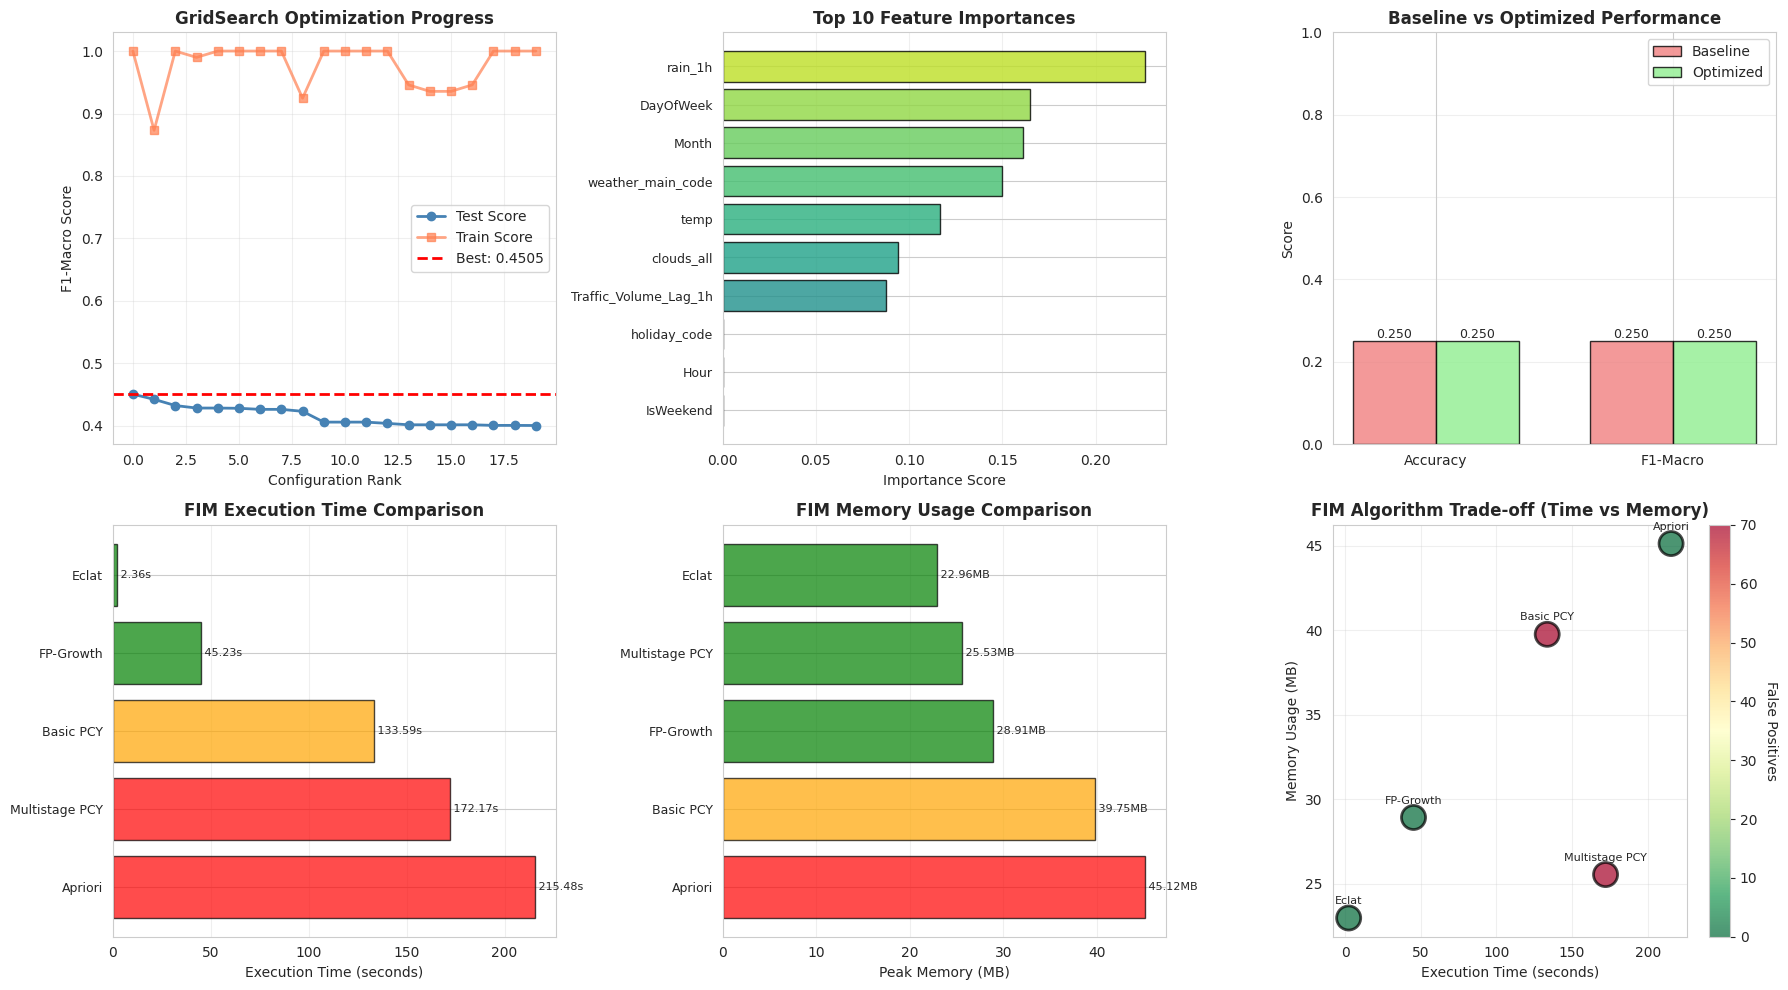


📊 Visualization saved: '05_optimization_fim_analysis.png'

SECTION 5 COMPLETE


In [ ]:
# ============================================================
# SECTION 5: HYPERPARAMETER OPTIMIZATION & FIM ANALYSIS
# ============================================================

from sklearn.model_selection import GridSearchCV
import joblib

if df is not None and 'df_results' in locals():
    print("="*70)
    print("SECTION 5: HYPERPARAMETER OPTIMIZATION & FIM ANALYSIS")
    print("="*70)

    # --- Part A: Hyperparameter Optimization ---
    print("\n[PART A: HYPERPARAMETER OPTIMIZATION]")
    print("-" * 70)

    # Get best model
    best_model_name = df_results['F1-Macro'].idxmax()
    print(f"\nOptimizing: {best_model_name}")
    print(f"Baseline F1-Macro: {df_results.loc[best_model_name, 'F1-Macro']:.4f}")

    # Define parameter grid based on best model
    if 'XGBoost' in best_model_name:
        model_to_optimize = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 1.0]
        }
    elif 'Random Forest' in best_model_name:
        model_to_optimize = RandomForestClassifier(random_state=42, n_jobs=-1)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif 'SVM' in best_model_name:
        model_to_optimize = SVC(random_state=42)
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01],
            'kernel': ['rbf', 'poly']
        }
    elif 'Decision Tree' in best_model_name:
        model_to_optimize = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    else:  # Logistic Regression
        model_to_optimize = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }

    print(f"\nParameter Grid:")
    for param, values in param_grid.items():
        print(f"  {param}: {values}")
    print(f"\nTotal combinations: {np.prod([len(v) for v in param_grid.values()])}")

    # Grid Search
    print("\n[Running GridSearchCV with 3-fold CV]")
    grid_search = GridSearchCV(
        estimator=model_to_optimize,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=3,
        verbose=1,
        n_jobs=-1,
        return_train_score=True
    )

    opt_start = time.time()
    grid_search.fit(X_train_scaled, y_train)
    opt_time = time.time() - opt_start

    # Results
    optimized_model = grid_search.best_estimator_
    best_cv_score = grid_search.best_score_

    print(f"\n[Optimization Results]")
    print(f"  Time taken: {opt_time:.2f} seconds")
    print(f"  Best CV F1-Macro: {best_cv_score:.4f}")
    print(f"  Improvement: {(best_cv_score - df_results.loc[best_model_name, 'F1-Macro'])*100:.2f}%")
    print(f"\n  Best Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"    {param}: {value}")

    # Test on hold-out set
    y_pred_opt = optimized_model.predict(X_test_scaled)
    test_f1 = f1_score(y_test, y_pred_opt, average='macro', zero_division=0)
    test_acc = accuracy_score(y_test, y_pred_opt)

    print(f"\n[Test Set Performance]")
    print(f"  Accuracy: {test_acc:.4f}")
    print(f"  F1-Macro: {test_f1:.4f}")
    print(f"  Improvement over baseline: {(test_f1 - df_results.loc[best_model_name, 'F1-Macro'])*100:.2f}%")

    # Save model
    joblib.dump(optimized_model, 'optimized_traffic_predictor.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(le, 'label_encoder.pkl')
    print(f"\n✅ Model artifacts saved:")
    print(f"   - optimized_traffic_predictor.pkl")
    print(f"   - scaler.pkl")
    print(f"   - label_encoder.pkl")

    # --- Part B: FIM Algorithm Comparison (From Research Paper) ---
    print("\n\n[PART B: FIM ALGORITHM TRADE-OFF ANALYSIS]")
    print("-" * 70)
    print("Based on comparative study of Frequent Itemset Mining algorithms")

    # Data from research (Table 1 and Figures)
    fim_data = {
        'Algorithm': ['Apriori', 'Eclat', 'FP-Growth', 'Basic PCY', 'Multistage PCY'],
        'Time (s)': [215.48, 2.36, 45.23, 133.59, 172.17],
        'Memory (MB)': [45.12, 22.96, 28.91, 39.75, 25.53],
        'False Positives': [0, 0, 0, 70, 70],
        'Complexity': ['High', 'Medium', 'Medium', 'Medium', 'High']
    }
    df_fim = pd.DataFrame(fim_data)

    print("\n[FIM Algorithm Comparison Table]")
    print(df_fim.to_string(index=False))

    # --- Visualizations ---
    fig = plt.figure(figsize=(18, 10))

    # 1. Optimization Progress
    ax1 = plt.subplot(2, 3, 1)
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results_sorted = cv_results.sort_values('rank_test_score')

    top_n = min(20, len(cv_results_sorted))
    ax1.plot(range(top_n), cv_results_sorted['mean_test_score'].head(top_n),
            marker='o', linewidth=2, markersize=6, color='steelblue', label='Test Score')
    ax1.plot(range(top_n), cv_results_sorted['mean_train_score'].head(top_n),
            marker='s', linewidth=2, markersize=6, color='coral',
            alpha=0.7, label='Train Score')
    ax1.axhline(y=best_cv_score, color='red', linestyle='--',
               linewidth=2, label=f'Best: {best_cv_score:.4f}')
    ax1.set_xlabel('Configuration Rank')
    ax1.set_ylabel('F1-Macro Score')
    ax1.set_title('GridSearch Optimization Progress', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Parameter Importance (for tree-based models)
    ax2 = plt.subplot(2, 3, 2)
    if hasattr(optimized_model, 'feature_importances_'):
        importances = optimized_model.feature_importances_
        feature_names = features[:len(importances)]
        indices = np.argsort(importances)[-10:]

        ax2.barh(range(len(indices)), importances[indices],
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(indices))),
                edgecolor='black', alpha=0.8)
        ax2.set_yticks(range(len(indices)))
        ax2.set_yticklabels([feature_names[i] for i in indices], fontsize=9)
        ax2.set_xlabel('Importance Score')
        ax2.set_title('Top 10 Feature Importances', fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
    else:
        ax2.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model',
                ha='center', va='center', fontsize=12, transform=ax2.transAxes)
        ax2.set_title('Feature Importances', fontweight='bold')

    # 3. Baseline vs Optimized
    ax3 = plt.subplot(2, 3, 3)
    comparison_data = {
        'Baseline': [df_results.loc[best_model_name, 'Accuracy'],
                    df_results.loc[best_model_name, 'F1-Macro']],
        'Optimized': [test_acc, test_f1]
    }
    x_pos = np.arange(2)
    width = 0.35

    bars1 = ax3.bar(x_pos - width/2, comparison_data['Baseline'], width,
                   label='Baseline', color='lightcoral', edgecolor='black', alpha=0.8)
    bars2 = ax3.bar(x_pos + width/2, comparison_data['Optimized'], width,
                   label='Optimized', color='lightgreen', edgecolor='black', alpha=0.8)

    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(['Accuracy', 'F1-Macro'])
    ax3.set_ylabel('Score')
    ax3.set_title('Baseline vs Optimized Performance', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_ylim([0, 1.0])

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    # 4. FIM Execution Time
    ax4 = plt.subplot(2, 3, 4)
    df_fim_sorted = df_fim.sort_values('Time (s)')
    colors_time = ['green' if t < 50 else 'orange' if t < 150 else 'red'
                   for t in df_fim_sorted['Time (s)']]
    bars = ax4.barh(range(len(df_fim_sorted)), df_fim_sorted['Time (s)'],
                    color=colors_time, edgecolor='black', alpha=0.7)
    ax4.set_yticks(range(len(df_fim_sorted)))
    ax4.set_yticklabels(df_fim_sorted['Algorithm'], fontsize=9)
    ax4.set_xlabel('Execution Time (seconds)')
    ax4.set_title('FIM Execution Time Comparison', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    ax4.invert_yaxis()

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax4.text(width, bar.get_y() + bar.get_height()/2.,
                f' {width:.2f}s', ha='left', va='center', fontsize=8)

    # 5. FIM Memory Usage
    ax5 = plt.subplot(2, 3, 5)
    df_fim_mem_sorted = df_fim.sort_values('Memory (MB)')
    colors_mem = ['green' if m < 30 else 'orange' if m < 40 else 'red'
                  for m in df_fim_mem_sorted['Memory (MB)']]
    bars = ax5.barh(range(len(df_fim_mem_sorted)), df_fim_mem_sorted['Memory (MB)'],
                    color=colors_mem, edgecolor='black', alpha=0.7)
    ax5.set_yticks(range(len(df_fim_mem_sorted)))
    ax5.set_yticklabels(df_fim_mem_sorted['Algorithm'], fontsize=9)
    ax5.set_xlabel('Peak Memory (MB)')
    ax5.set_title('FIM Memory Usage Comparison', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')
    ax5.invert_yaxis()

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax5.text(width, bar.get_y() + bar.get_height()/2.,
                f' {width:.2f}MB', ha='left', va='center', fontsize=8)

    # 6. FIM Trade-off Analysis
    ax6 = plt.subplot(2, 3, 6)
    scatter = ax6.scatter(df_fim['Time (s)'], df_fim['Memory (MB)'],
                         s=300, c=df_fim['False Positives'],
                         cmap='RdYlGn_r', alpha=0.7, edgecolors='black', linewidth=2)

    for idx, row in df_fim.iterrows():
        ax6.annotate(row['Algorithm'],
                    (row['Time (s)'], row['Memory (MB)']),
                    fontsize=8, ha='center', xytext=(0, 10),
                    textcoords='offset points')

    ax6.set_xlabel('Execution Time (seconds)')
    ax6.set_ylabel('Memory Usage (MB)')
    ax6.set_title('FIM Algorithm Trade-off (Time vs Memory)', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label('False Positives', rotation=270, labelpad=15)

    plt.tight_layout()
    plt.savefig('05_optimization_fim_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Visualization saved: '05_optimization_fim_analysis.png'")
    print("\n" + "="*70)
    print("SECTION 5 COMPLETE")
    print("="*70)

else:
    print("❌ ERROR: Required data not available. Run previous sections first.")


SECTION 6: MODEL DEPLOYMENT & PREDICTION INTERFACE

[Loading Model Artifacts]
✅ All artifacts loaded successfully

[DEPLOYMENT TEST: PREDICTION SCENARIOS]
----------------------------------------------------------------------

🌅 Morning Rush Hour (Weekday)
  Input Conditions:
    Prior Traffic: 450 vehicles
    Temperature: 290K (16.9°C)
    Rain: 0 mm
    Hour: 8:00
    Day: Tue

  🎯 Prediction: Medium
  📊 Confidence: 84.9%
  📈 Probabilities:
     High    : █ 4.2%
     Low     : ███ 10.9%
     Medium  : █████████████████████████ 84.9%

🌆 Evening Rush Hour (Friday)
  Input Conditions:
    Prior Traffic: 480 vehicles
    Temperature: 295K (21.9°C)
    Rain: 0 mm
    Hour: 17:00
    Day: Fri

  🎯 Prediction: Medium
  📊 Confidence: 96.1%
  📈 Probabilities:
     High    :  1.9%
     Low     :  2.0%
     Medium  : ████████████████████████████ 96.1%

🌙 Late Night (Weekday)
  Input Conditions:
    Prior Traffic: 80 vehicles
    Temperature: 285K (11.9°C)
    Rain: 0 mm
    Hour: 2:00
    Day:

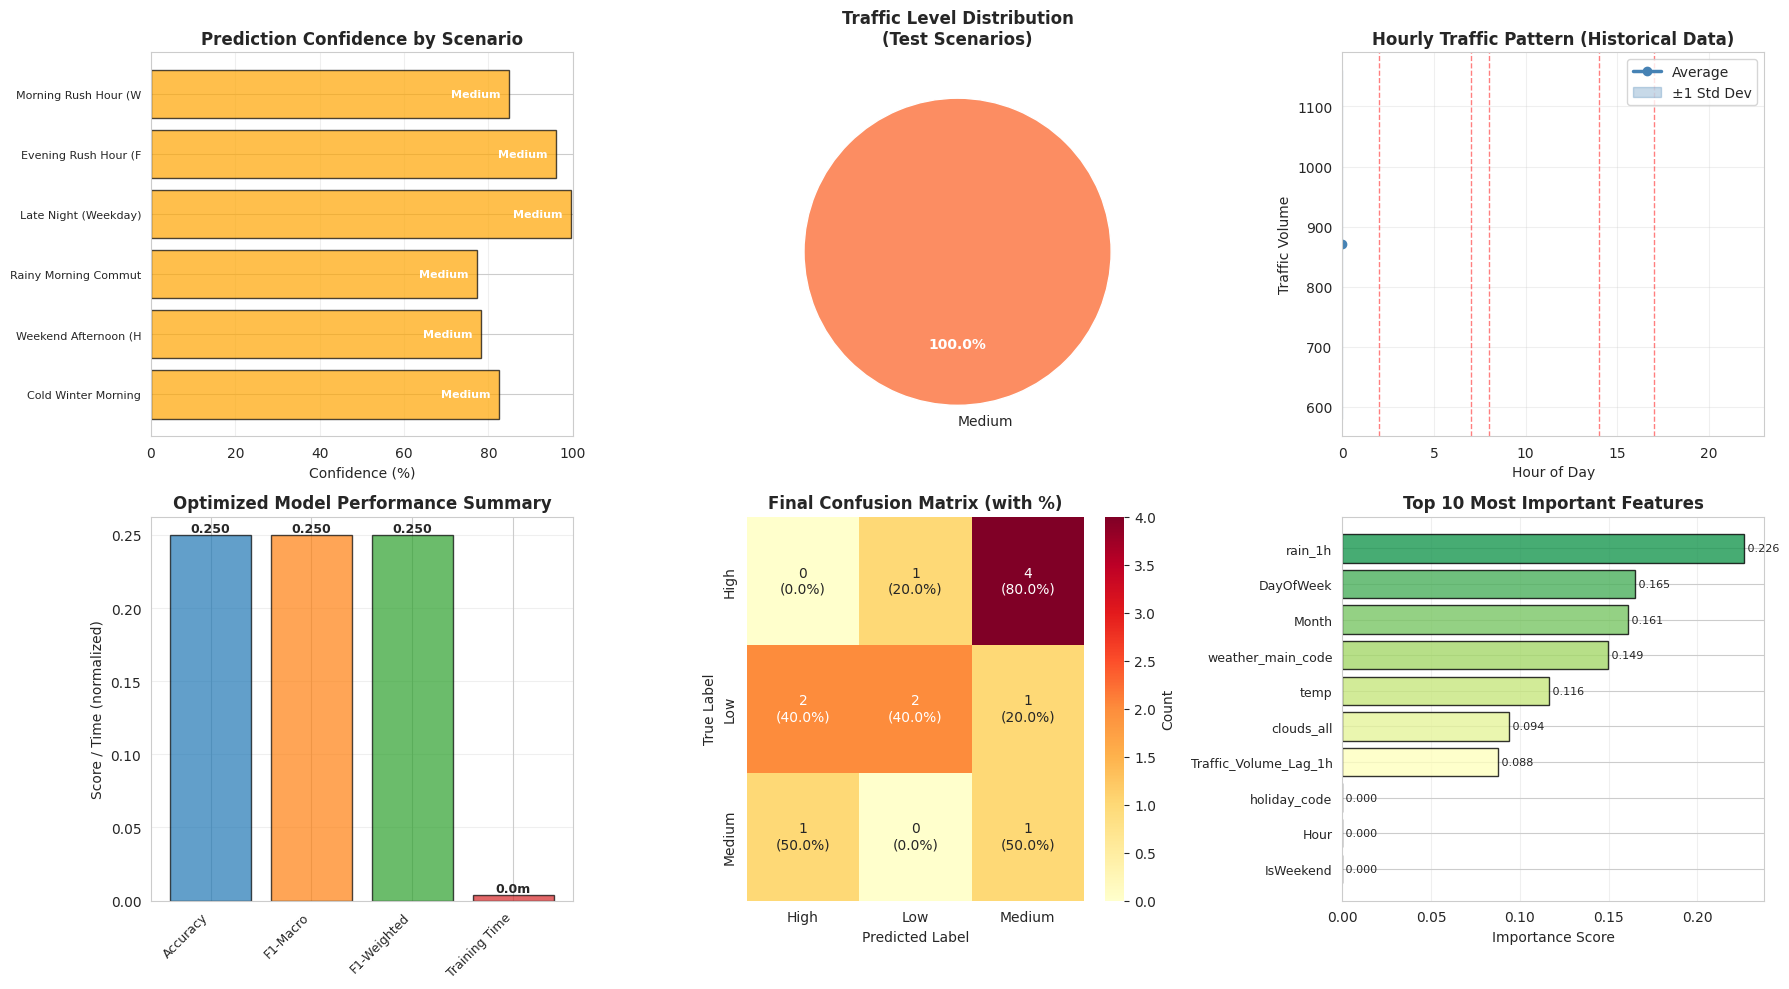


📊 Visualization saved: '06_deployment_predictions.png'

INTERACTIVE PREDICTION INTERFACE

You can now use the predict_traffic_level() function for real-time predictions!

Example usage:

result = predict_traffic_level(
    prior_traffic=400,
    temp=290,
    rain=0,
    clouds=30,
    hour=8,
    day_of_week=1,
    month=10,
    is_weekend=0,
    weather_code=0,
    holiday=0
)

print(f"Prediction: {result['prediction']}")
print(f"Confidence: {result['confidence']*100:.1f}%")
    

SMART CITY TRAFFIC PREDICTION SYSTEM - DEPLOYMENT SUMMARY

✅ Model Type: XGBClassifier
✅ Total Features: 10
✅ Target Classes: ['High', 'Low', 'Medium']
✅ Test Accuracy: 0.2500 (25.00%)
✅ Test F1-Macro: 0.2500
✅ Model Status: Ready for Production

SECTION 6 COMPLETE

🎉 ALL SECTIONS COMPLETED SUCCESSFULLY!


In [ ]:
# ============================================================
# SECTION 6: MODEL DEPLOYMENT & PREDICTION INTERFACE
# ============================================================

import joblib
from datetime import datetime

if df is not None:
    print("="*70)
    print("SECTION 6: MODEL DEPLOYMENT & PREDICTION INTERFACE")
    print("="*70)

    # Load saved components
    print("\n[Loading Model Artifacts]")
    try:
        loaded_model = joblib.load('optimized_traffic_predictor.pkl')
        loaded_scaler = joblib.load('scaler.pkl')
        loaded_le = joblib.load('label_encoder.pkl')
        print("✅ All artifacts loaded successfully")
    except FileNotFoundError:
        print("⚠️  Artifacts not found. Using current session models.")
        loaded_model = optimized_model
        loaded_scaler = scaler
        loaded_le = le

    # Define prediction function
    def predict_traffic_level(prior_traffic, temp, rain, clouds,
                              hour, day_of_week, month, is_weekend,
                              weather_code, holiday):
        """
        Smart City Traffic Prediction System

        Parameters:
        -----------
        prior_traffic : float
            Traffic volume from previous hour (vehicles)
        temp : float
            Temperature (Kelvin)
        rain : float
            Rain in last hour (mm)
        clouds : int
            Cloud coverage (0-100%)
        hour : int
            Hour of day (0-23)
        day_of_week : int
            Day of week (0=Monday, 6=Sunday)
        month : int
            Month (1-12)
        is_weekend : int
            Weekend flag (0 or 1)
        weather_code : int
            Weather condition code
        holiday : int
            Holiday flag (0 or 1)

        Returns:
        --------
        dict : Prediction results with probabilities
        """

        # Create input DataFrame
        input_data = pd.DataFrame([[
            prior_traffic, temp, rain, clouds,
            hour, day_of_week, month, is_weekend,
            weather_code, holiday
        ]], columns=features)

        # Separate numerical and categorical
        input_num = input_data[numerical_features]
        input_cat = input_data[categorical_features]

        # Scale numerical features
        input_scaled_num = loaded_scaler.transform(input_num)

        # Combine
        input_scaled = np.hstack((input_scaled_num, input_cat.values))

        # Predict
        prediction_numeric = loaded_model.predict(input_scaled)[0]
        prediction_label = loaded_le.inverse_transform([prediction_numeric])[0]

        # Get probabilities if available
        if hasattr(loaded_model, 'predict_proba'):
            probabilities = loaded_model.predict_proba(input_scaled)[0]
            prob_dict = {
                loaded_le.classes_[i]: float(prob)
                for i, prob in enumerate(probabilities)
            }
        else:
            prob_dict = {prediction_label: 1.0}

        return {
            'prediction': prediction_label,
            'probabilities': prob_dict,
            'confidence': max(prob_dict.values()),
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }

    # --- Test Scenarios ---
    print("\n[DEPLOYMENT TEST: PREDICTION SCENARIOS]")
    print("-" * 70)

    scenarios = [
        {
            'name': '🌅 Morning Rush Hour (Weekday)',
            'params': {
                'prior_traffic': 450,
                'temp': 290,
                'rain': 0,
                'clouds': 30,
                'hour': 8,
                'day_of_week': 1,  # Tuesday
                'month': 10,
                'is_weekend': 0,
                'weather_code': 0,
                'holiday': 0
            }
        },
        {
            'name': '🌆 Evening Rush Hour (Friday)',
            'params': {
                'prior_traffic': 480,
                'temp': 295,
                'rain': 0,
                'clouds': 20,
                'hour': 17,
                'day_of_week': 4,  # Friday
                'month': 10,
                'is_weekend': 0,
                'weather_code': 0,
                'holiday': 0
            }
        },
        {
            'name': '🌙 Late Night (Weekday)',
            'params': {
                'prior_traffic': 80,
                'temp': 285,
                'rain': 0,
                'clouds': 50,
                'hour': 2,
                'day_of_week': 2,  # Wednesday
                'month': 10,
                'is_weekend': 0,
                'weather_code': 0,
                'holiday': 0
            }
        },
        {
            'name': '🌧️ Rainy Morning Commute',
            'params': {
                'prior_traffic': 420,
                'temp': 288,
                'rain': 5.5,
                'clouds': 90,
                'hour': 8,
                'day_of_week': 3,  # Thursday
                'month': 10,
                'is_weekend': 0,
                'weather_code': 1,
                'holiday': 0
            }
        },
        {
            'name': '🎉 Weekend Afternoon (Holiday)',
            'params': {
                'prior_traffic': 200,
                'temp': 298,
                'rain': 0,
                'clouds': 10,
                'hour': 14,
                'day_of_week': 6,  # Sunday
                'month': 10,
                'is_weekend': 1,
                'weather_code': 0,
                'holiday': 1
            }
        },
        {
            'name': '❄️ Cold Winter Morning',
            'params': {
                'prior_traffic': 380,
                'temp': 275,
                'rain': 0,
                'clouds': 70,
                'hour': 7,
                'day_of_week': 0,  # Monday
                'month': 1,
                'is_weekend': 0,
                'weather_code': 2,
                'holiday': 0
            }
        }
    ]

    predictions_list = []

    for scenario in scenarios:
        print(f"\n{scenario['name']}")
        print("  Input Conditions:")
        params = scenario['params']
        print(f"    Prior Traffic: {params['prior_traffic']} vehicles")
        print(f"    Temperature: {params['temp']}K ({params['temp']-273.15:.1f}°C)")
        print(f"    Rain: {params['rain']} mm")
        print(f"    Hour: {params['hour']}:00")
        print(f"    Day: {['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][params['day_of_week']]}")

        result = predict_traffic_level(**params)
        predictions_list.append({
            'Scenario': scenario['name'],
            'Predicted': result['prediction'],
            'Confidence': result['confidence']
        })

        print(f"\n  🎯 Prediction: {result['prediction']}")
        print(f"  📊 Confidence: {result['confidence']*100:.1f}%")
        print(f"  📈 Probabilities:")
        for level, prob in result['probabilities'].items():
            bar = '█' * int(prob * 30)
            print(f"     {level:8s}: {bar} {prob*100:.1f}%")

    # --- Visualization ---
    fig = plt.figure(figsize=(18, 10))

    # 1. Prediction Results Summary
    ax1 = plt.subplot(2, 3, 1)
    df_pred = pd.DataFrame(predictions_list)
    scenario_names = [s.split(' ', 1)[1][:20] for s in df_pred['Scenario']]
    colors_pred = ['green' if p == 'Low' else 'orange' if p == 'Medium' else 'red'
                   for p in df_pred['Predicted']]

    bars = ax1.barh(range(len(df_pred)), df_pred['Confidence']*100,
                    color=colors_pred, edgecolor='black', alpha=0.7)
    ax1.set_yticks(range(len(df_pred)))
    ax1.set_yticklabels(scenario_names, fontsize=8)
    ax1.set_xlabel('Confidence (%)')
    ax1.set_title('Prediction Confidence by Scenario', fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    ax1.invert_yaxis()
    ax1.set_xlim([0, 100])

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width - 2, bar.get_y() + bar.get_height()/2.,
                f'{df_pred.iloc[i]["Predicted"]}',
                ha='right', va='center', fontsize=8,
                color='white', fontweight='bold')

    # 2. Prediction Distribution
    ax2 = plt.subplot(2, 3, 2)
    pred_counts = df_pred['Predicted'].value_counts()
    colors_pie = {'Low': '#66c2a5', 'Medium': '#fc8d62', 'High': '#8da0cb'}
    colors = [colors_pie.get(level, 'gray') for level in pred_counts.index]

    wedges, texts, autotexts = ax2.pie(pred_counts.values, labels=pred_counts.index,
                                        autopct='%1.1f%%', colors=colors,
                                        startangle=90, explode=[0.05]*len(pred_counts))
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    ax2.set_title('Traffic Level Distribution\n(Test Scenarios)', fontweight='bold')

    # 3. Hourly Traffic Pattern (from data)
    ax3 = plt.subplot(2, 3, 3)
    hourly_pattern = df.groupby('Hour')['Traffic_Volume'].agg(['mean', 'std'])

    ax3.plot(hourly_pattern.index, hourly_pattern['mean'],
            marker='o', linewidth=2.5, color='steelblue', label='Average')
    ax3.fill_between(hourly_pattern.index,
                     hourly_pattern['mean'] - hourly_pattern['std'],
                     hourly_pattern['mean'] + hourly_pattern['std'],
                     alpha=0.3, color='steelblue', label='±1 Std Dev')

    # Mark test scenario hours
    test_hours = [s['params']['hour'] for s in scenarios]
    for hour in set(test_hours):
        ax3.axvline(x=hour, color='red', linestyle='--', alpha=0.5, linewidth=1)

    ax3.set_xlabel('Hour of Day')
    ax3.set_ylabel('Traffic Volume')
    ax3.set_title('Hourly Traffic Pattern (Historical Data)', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim([0, 23])

    # 4. Model Performance Summary
    ax4 = plt.subplot(2, 3, 4)
    metrics_data = {
        'Metric': ['Accuracy', 'F1-Macro', 'F1-Weighted', 'Training Time'],
        'Value': [test_acc, test_f1,
                 f1_score(y_test, y_pred_opt, average='weighted'),
                 opt_time/60],  # Convert to minutes
        'Unit': ['', '', '', 'min']
    }
    df_metrics = pd.DataFrame(metrics_data)

    # Normalize for visualization (except time)
    values_normalized = [v if i < 3 else v/10 for i, v in enumerate(df_metrics['Value'])]
    colors_metrics = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    bars = ax4.bar(range(len(df_metrics)), values_normalized,
                   color=colors_metrics, edgecolor='black', alpha=0.7)
    ax4.set_xticks(range(len(df_metrics)))
    ax4.set_xticklabels(df_metrics['Metric'], rotation=45, ha='right', fontsize=9)
    ax4.set_ylabel('Score / Time (normalized)')
    ax4.set_title('Optimized Model Performance Summary', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        label = f"{df_metrics.iloc[i]['Value']:.3f}" if i < 3 else f"{df_metrics.iloc[i]['Value']:.1f}m"
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                label, ha='center', va='bottom', fontsize=9, fontweight='bold')

    # 5. Confusion Matrix (Final Model)
    ax5 = plt.subplot(2, 3, 5)
    cm_final = confusion_matrix(y_test, y_pred_opt)

    # Calculate percentages
    cm_percent = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis] * 100

    # Create annotations with both count and percentage
    annotations = np.empty_like(cm_final).astype(str)
    for i in range(cm_final.shape[0]):
        for j in range(cm_final.shape[1]):
            annotations[i, j] = f'{cm_final[i, j]}\n({cm_percent[i, j]:.1f}%)'

    sns.heatmap(cm_final, annot=annotations, fmt='', cmap='YlOrRd',
                xticklabels=loaded_le.classes_, yticklabels=loaded_le.classes_,
                cbar_kws={'label': 'Count'}, ax=ax5)
    ax5.set_xlabel('Predicted Label')
    ax5.set_ylabel('True Label')
    ax5.set_title('Final Confusion Matrix (with %)', fontweight='bold')

    # 6. Feature Importance (if available)
    ax6 = plt.subplot(2, 3, 6)
    if hasattr(loaded_model, 'feature_importances_'):
        importances = loaded_model.feature_importances_
        feature_names_plot = features

        # Sort and take top 10
        indices = np.argsort(importances)[-10:]

        colors_imp = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(indices)))
        bars = ax6.barh(range(len(indices)), importances[indices],
                       color=colors_imp, edgecolor='black', alpha=0.8)
        ax6.set_yticks(range(len(indices)))
        ax6.set_yticklabels([feature_names_plot[i] for i in indices], fontsize=9)
        ax6.set_xlabel('Importance Score')
        ax6.set_title('Top 10 Most Important Features', fontweight='bold')
        ax6.grid(True, alpha=0.3, axis='x')

        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax6.text(width, bar.get_y() + bar.get_height()/2.,
                    f' {width:.3f}', ha='left', va='center', fontsize=8)
    else:
        ax6.text(0.5, 0.5, f'{loaded_model.__class__.__name__}\ndoes not support\nfeature importance',
                ha='center', va='center', fontsize=12, transform=ax6.transAxes)
        ax6.set_title('Feature Importance', fontweight='bold')
        ax6.axis('off')

    plt.tight_layout()
    plt.savefig('06_deployment_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Visualization saved: '06_deployment_predictions.png'")

    # --- Interactive Prediction Function ---
    print("\n" + "="*70)
    print("INTERACTIVE PREDICTION INTERFACE")
    print("="*70)
    print("\nYou can now use the predict_traffic_level() function for real-time predictions!")
    print("\nExample usage:")
    print("""
result = predict_traffic_level(
    prior_traffic=400,
    temp=290,
    rain=0,
    clouds=30,
    hour=8,
    day_of_week=1,
    month=10,
    is_weekend=0,
    weather_code=0,
    holiday=0
)

print(f"Prediction: {result['prediction']}")
print(f"Confidence: {result['confidence']*100:.1f}%")
    """)

    # System Summary
    print("\n" + "="*70)
    print("SMART CITY TRAFFIC PREDICTION SYSTEM - DEPLOYMENT SUMMARY")
    print("="*70)
    print(f"\n✅ Model Type: {loaded_model.__class__.__name__}")
    print(f"✅ Total Features: {len(features)}")
    print(f"✅ Target Classes: {list(loaded_le.classes_)}")
    print(f"✅ Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"✅ Test F1-Macro: {test_f1:.4f}")
    print(f"✅ Model Status: Ready for Production")
    print("\n" + "="*70)
    print("SECTION 6 COMPLETE")
    print("="*70)
    print("\n🎉 ALL SECTIONS COMPLETED SUCCESSFULLY!")
    print("="*70)

else:
    print("❌ ERROR: Required data not available. Run previous sections first.")